<a href="https://colab.research.google.com/github/iure123/Diversidade-Tech/blob/main/analise_exploratoria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identificação das colunas (Features)

CustomerId: identificação do cliente.

Surname: sobrenome do cliente.

CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência.

Geography: país que o serviço é oferecido.

Gender: sexo do cliente.

Age: idade do cleinte.

Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

Balance: saldo da conta corrente.

NumOfProducts: número de produtos bancários adquiridos.

HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0).

IsActiveMember: se é um cliente com conta ativa, (Ativo = 1).

EstimatedSalary: salário estimado.

Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df_churn = pd.read_csv('churn.csv')
df_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df_churn.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_churn.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [7]:
#EXISTE UMA IMPOTÂNCIA MUITO GRUPO AGORA NO INÍCIO DE INDENFICAR QUAIS DADOS SÃO QUALITATIVOS E QUAIS SÃO QUANTITATIVOS 
#pra saber se é quantitativo é só ver se da para fazer a média, caso não dê, ele é qualitativo
arr_quali = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
arr_quanti = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

df_churn_quali = df_churn[arr_quali]
df_churn_quanti = df_churn[arr_quanti]



In [8]:
df_churn_quali

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0
...,...,...,...,...,...
9995,France,Male,1,0,0
9996,France,Male,1,1,0
9997,France,Female,0,1,1
9998,Germany,Male,1,0,1


In [9]:
df_churn_quali.describe()

,HasCrCard,IsActiveMember,Exited
count,10000.00000,10000.000000,10000.000000
mean,0.70550,0.515100,0.203700
std,0.45584,0.499797,0.402769
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,1.00000,1.000000,0.000000
75%,1.00000,1.000000,0.000000
max,1.00000,1.000000,1.000000


In [10]:
df_churn_quanti.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,199992.48,1.0


In [11]:
df_churn_quanti.loc[(df_churn_quanti.Exited == 1) & (df_churn_quanti.Tenure == 10)]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
172,480,44,10,129608.57,1,5472.70,1
223,850,33,10,0.00,1,4861.72,1
245,635,40,10,123497.58,1,131953.23,1
339,716,39,10,115301.31,1,43527.40,1
376,745,45,10,117231.63,3,122381.02,1
...,...,...,...,...,...,...,...
9690,846,34,10,142388.61,2,68393.64,1
9693,617,51,10,167273.71,1,93439.75,1
9825,467,28,10,126315.26,1,32349.29,1
9934,692,43,10,118588.83,1,161241.65,1


In [12]:
df_churn.duplicated().sum()
#verifica se tem valor duplicado

0

In [13]:
df_churn_quanti.groupby(["Exited"]).size()


Exited
0    7963
1    2037
dtype: int64

Age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

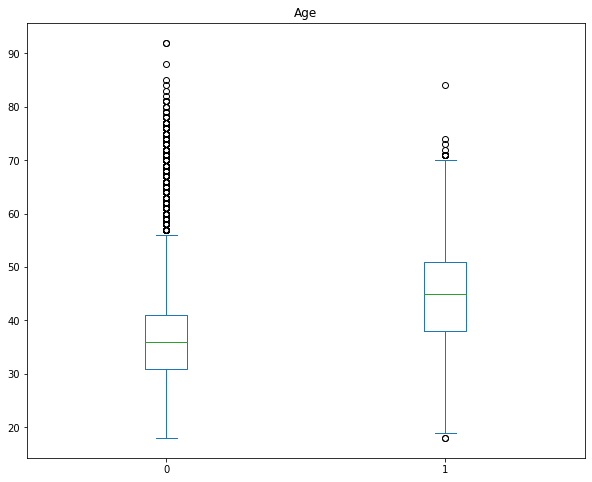

In [14]:
df_churn_quanti.plot.box(column="Age", by="Exited", figsize =(10,8))

In [15]:
df_churn.isna().sum()
#verifica se tem valor faltando

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
print(f"Saíram: {len(df_churn.query('Exited == 1'))}")
print(f"Ficaram: {len(df_churn.query('Exited == 0'))}")

Saíram: 2037
Ficaram: 7963


In [17]:
df_churn.shape
#mostrando o tamanho da tabela sem ter que importar toda a tabela 

(10000, 14)

In [18]:
df_churn.describe().round(2)
#mostra algumas métricas interessantes da tabela, como max e min, média, entre outros

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [19]:
df_produtosXsalario = df_churn[['EstimatedSalary', 'NumOfProducts']]


In [20]:
df_produtosXsalario.describe()

,EstimatedSalary,NumOfProducts
count,10000.000000,10000.000000
mean,100090.239881,1.530200
std,57510.492818,0.581654
min,11.580000,1.000000
25%,51002.110000,1.000000
50%,100193.915000,1.000000
75%,149388.247500,2.000000
max,199992.480000,4.000000


In [21]:
#pegar uma linha
# df_churn.loc[1]
# dataFrame_df.loc[linha, coluna] <- Assim funciona o loc 

#pegar linhas que correspondem a uma condição
#df_churn.loc[df_churn['NumOfProducts'] == 4]

#pegar várias linhas e colunas usando o loc
#df_churn.loc[df_churn['NumOfProducts'] == 2, ['CreditScore', 'HasCrCard', 'Exited', 'EstimatedSalary']]

#pegar 1 valor específico
#df_churn.loc[2, 'NumOfProducts']

In [22]:
df_churn_quanti.loc[(df_churn_quanti.Balance > 0) & (df_churn_quanti.EstimatedSalary  <1000) & (df_churn_quanti.Exited == 0)] 

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
195,807,35,3,174790.15,1,600.36,0
396,557,33,3,54503.55,1,371.05,0
925,714,36,1,101609.01,2,447.73,0
932,708,42,8,192390.52,2,823.36,0
1139,727,57,1,109679.72,1,753.37,0
1758,642,30,5,129753.69,1,582.53,0
2046,520,34,8,120018.86,2,343.38,0
2723,614,41,8,121558.46,1,598.80,0
3446,649,37,9,87374.88,2,247.36,0
3775,528,22,5,93547.23,2,961.57,0


In [23]:
df_churn_quanti.loc[(df_churn_quanti.Exited == 1)]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
2,502,42,8,159660.80,3,113931.57,1
5,645,44,8,113755.78,2,149756.71,1
7,376,29,4,115046.74,4,119346.88,1
16,653,58,1,132602.88,1,5097.67,1
...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,53445.17,1
9982,655,46,7,137145.12,1,115146.40,1
9991,597,53,4,88381.21,1,69384.71,1
9997,709,36,7,0.00,1,42085.58,1


In [24]:
df_churn_quanti.loc[(df_churn_quanti.Balance > 2 ) & (df_churn_quanti.Exited == 1)]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
2,502,42,8,159660.80,3,113931.57,1
5,645,44,8,113755.78,2,149756.71,1
7,376,29,4,115046.74,4,119346.88,1
16,653,58,1,132602.88,1,5097.67,1
35,475,45,0,134264.04,1,27822.99,1
...,...,...,...,...,...,...,...
9975,610,50,1,113957.01,2,196526.55,1
9981,498,42,3,152039.70,1,53445.17,1
9982,655,46,7,137145.12,1,115146.40,1
9991,597,53,4,88381.21,1,69384.71,1


In [25]:
df_churn.round(0)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101349.0,1
1,2,15647311,Hill,608,Spain,Female,41,1,83808.0,1,0,1,112543.0,0
2,3,15619304,Onio,502,France,Female,42,8,159661.0,3,1,0,113932.0,1
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93827.0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125511.0,1,1,1,79084.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.0,2,1,0,96271.0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57370.0,1,1,1,101700.0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.0,1,0,1,42086.0,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.0,2,1,0,92889.0,1


In [26]:
df_churn_quanti

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0
9996,516,35,10,57369.61,1,101699.77,0
9997,709,36,7,0.00,1,42085.58,1
9998,772,42,3,75075.31,2,92888.52,1


CRIANDO ALGUNS GRÁFICOS


In [39]:
 df_churn_quanti[df_churn_quanti['Exited'] == 1].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,2037.00,2037.00,2037.00,2037.00,2037.00,2037.00,2037.0
mean,645.35,44.84,4.93,91108.54,1.48,101465.68,1.0
std,100.32,9.76,2.94,58360.79,0.80,57912.42,0.0
min,350.00,18.00,0.00,0.00,1.00,11.58,1.0
25%,578.00,38.00,2.00,38340.02,1.00,51907.72,1.0
50%,646.00,45.00,5.00,109349.29,1.00,102460.84,1.0
75%,716.00,51.00,8.00,131433.33,2.00,152422.91,1.0
max,850.00,84.00,10.00,250898.09,4.00,199808.10,1.0


Age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

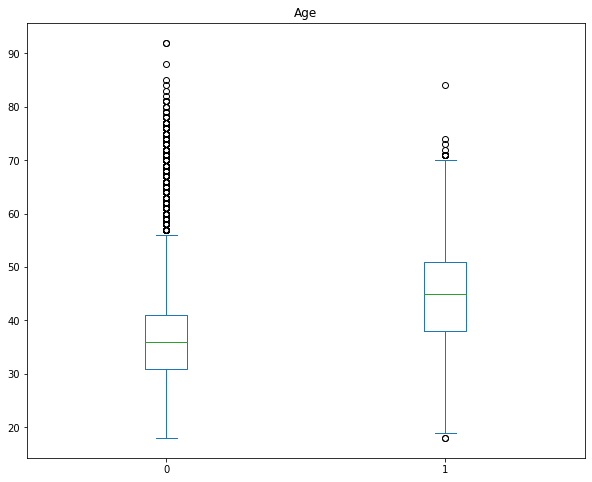

In [38]:
df_churn_quanti.plot.box(column="Age", by="Exited", figsize =(10,8))

In [28]:
def compara_churn(coluna):
  exited_Column =df_churn.groupby([coluna, 'Exited']).size()
  coluna = df_churn.groupby(coluna).size()
  return (exited_Column / coluna*100).reset_index(name="Proporção")

In [29]:
compara_churn('Gender')

,Gender,Exited,Proporção
0,Female,0,74.928461
1,Female,1,25.071539
2,Male,0,83.544072
3,Male,1,16.455928


In [30]:
table = pd.pivot_table(df_churn,index=["Geography"],
               values=["Exited"],
               aggfunc=[np.count_nonzero],fill_value=0)


In [32]:
table

,count_nonzero
,Exited
Geography,
France,810
Germany,814
Spain,413


In [31]:
sns.barplot(x='Gender', y="Exited", data=df_churn_quanti)


ValueError: Could not interpret input 'Gender'

In [ ]:
sns.barplot(x='Age', y="Exited", data=df_churn_quanti)


: 